In [ ]:
import sys
from random import randint

class Environment:
    def __init__(self):
        self.rows= 14
        self.columns = 20
        self.env = None
        self.goal_flag = True
        self.goal_pos = (2,17)
        self.directions = [
            (-1, 0), (1, 0), (0, -1), (0, 1),  # Cardinal directions
            (-1, -1), (-1, 1), (1, -1), (1, 1)  # Diagonals
        ]
    def create_defualt_environment(self):
        """
        Initialize the environment with dimensions (rows x cols) and randomly place obstacles.
        """
        map_matrix = [
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
            [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
            [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
            [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        ]

        # Initialize empty environment
        self.env = map_matrix

    def create_environment(self, rows, cols, obs):
        """
        Initialize the environment with dimensions (rows x cols) and randomly place obstacles.
        """
        if obs > rows * cols:
            raise ValueError("Number of obstacles cannot exceed the total number of cells.")
        if rows <= 0 or cols <= 0:
            raise ValueError("Environment dimensions must be positive.")

        # Initialize empty environment
        self.env = [[0 for _ in range(cols)] for _ in range(rows)]
        self.add_boundaries()
        self.add_obstacles(obs)
        
    def find_goal_pos(self):
        for i, row in enumerate(self.env):
            for j, cell in enumerate(row):
                if cell == 2:
                    self.goal_pos = (i, j)
                # Return the position as a tuple (row, column)
                
    def add_boundaries(self):
        """
        Add boundaries (1s) around the environment edges.
        """
        for col in range(len(self.env[0])):
            self.env[0][col] = self.env[-1][col] = 1  # Top and bottom boundaries
        for row in range(len(self.env)):
            self.env[row][0] = self.env[row][-1] = 1  # Left and right boundaries

    def add_obstacles(self, obs):
        """
        Randomly place obstacles (1s) in the environment.
        """
        while obs > 0:
            x, y = randint(1, len(self.env) - 2), randint(1, len(self.env[0]) - 2)
            if self.env[x][y] == 0:
                self.env[x][y] = 1
                obs -= 1

    def place_goal(self, pos):
        """
        Place a goal (2) in the environment. If a goal already exists, replace it.
        """
        if self.goal_flag:
            self.env[self.goal_pos[0]][self.goal_pos[1]] = 0  # Remove existing goal
        self.goal_pos = pos
        self.env[pos[0]][pos[1]] = 2
        self.goal_flag = True

    def start_wave(self):
        """
        Execute the wavefront algorithm to propagate values from the goal point.
        """
        if not self.goal_flag:
            raise ValueError("Goal not set.")

        wave_value = 2
        self.env[self.goal_pos[0]][self.goal_pos[1]] = wave_value
        queue = [self.goal_pos]

        while queue:
            next_queue = []
            for x, y in queue:
                for dx, dy in self.directions:
                    nx, ny = x + dx, y + dy
                    if 0 <= nx < len(self.env) and 0 <= ny < len(self.env[0]) and self.env[nx][ny] == 0:
                        self.env[nx][ny] = wave_value + 1
                        next_queue.append((nx, ny))
            wave_value += 1
            queue = next_queue

    def get_shortest_path(self, start):
        """
        Compute the shortest path from the start position to the goal.
        """
        # if self.env[start[0]][start[1]] in {0, 1}:
        #     raise ValueError("Invalid start point.")

        path = [start]
        current = start

        while current != self.goal_pos:
            x, y = current
            min_value = float('inf')
            next_step = None

            for dx, dy in self.directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < len(self.env) and 0 <= ny < len(self.env[0]) and self.env[nx][ny] > 1:
                    if self.env[nx][ny] < min_value:
                        min_value = self.env[nx][ny]
                        next_step = (nx, ny)

            if not next_step:
                raise ValueError("No valid path found.")
            path.append(next_step)
            current = next_step

        return path

    def set_enviroment(self, enviroment):
        self.env = enviroment
        self.find_goal_pos()
        
    def print_environment(self):
        """
        Print the current state of the environment.
        """
        for row in self.env:
            print(" ".join(f"{cell:2}" for cell in row))


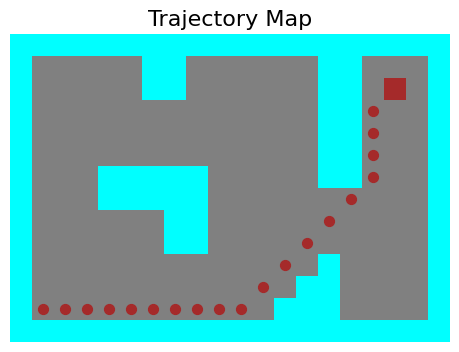

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
map_matrix = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
]

# Example grid representation (0: free space, 1: boundary/obstacle, 2: start, 3: goal, 4: path)

env = Environment()

env.create_defualt_environment()
env.start_wave()
grid = np.array(map_matrix)
shortest_path = env.get_shortest_path((12,1))
# Define custom colors
cmap = ListedColormap(['gray', 'blue', 'cyan', 'lime', 'brown'])

# Plot the trajectory map
plt.figure(figsize=(6, 4))
plt.imshow(grid, cmap=cmap, interpolation='nearest')

plt.title("Trajectory Map", fontsize=16)

for point in shortest_path:
    plt.scatter(point[1], point[0], color='brown', s=50)
plt.axis('off')  # Hide axes

# Show the map
plt.show()


In [38]:
from scipy.io import loadmat
# Load the .mat file
data = loadmat("maze.mat")

# Access the map variable
map_data = data['map']

# Print the map to verify
print("Loaded Map:")
print(map_data)
print(type(map_data))

# Example of initializing WavefrontPathfinder with the loaded map
pathfinder = Environment()
pathfinder.set_enviroment(map_data)
pathfinder.start_wave()  # Run the wavefront algorithm
pathfinder.print_environment()  # Display the processed environment


Loaded Map:
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 0 ... 0 1 1]
 ...
 [1 1 0 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
<class 'numpy.ndarray'>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19096\3779110536.py:99: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  self.env[nx][ny] = wave_value + 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19096\3779110536.py:99: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  self.env[nx][ny] = wave_value + 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19096\3779110536.py:99: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the futur

 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19096\3779110536.py:99: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 2024 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  self.env[nx][ny] = wave_value + 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19096\3779110536.py:99: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 2025 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  self.env[nx][ny] = wave_value + 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19096\3779110536.py:99: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 2026 to uint8 will fail in the fu

In [56]:
shortest_path = pathfinder.get_shortest_path((50,4))
print(shortest_path)

[(50, 4), (50, 5), (50, 6), (50, 7), (50, 8), (50, 9), (50, 10), (50, 11), (50, 12), (50, 13), (50, 14), (50, 15), (50, 16), (50, 17), (50, 18), (50, 19), (50, 20), (50, 21), (50, 22), (50, 23), (50, 24), (50, 25), (49, 26), (48, 26), (47, 26), (46, 26), (45, 26), (44, 26), (43, 26), (42, 26), (41, 26), (40, 26), (39, 26), (38, 26), (37, 26), (36, 27), (35, 28), (34, 29), (33, 30), (32, 31), (31, 32), (31, 33), (31, 34), (31, 35), (31, 36), (31, 37), (31, 38), (31, 39), (31, 40), (31, 41), (31, 42), (31, 43), (31, 44), (31, 45), (31, 46), (31, 47), (31, 48), (31, 49), (31, 50), (31, 51), (31, 52), (30, 53), (29, 54), (28, 55), (27, 56), (26, 57), (25, 58), (24, 58), (23, 57), (23, 56), (23, 55), (23, 54), (23, 53), (23, 52), (23, 51), (23, 50), (23, 49), (23, 48), (23, 47), (23, 46), (23, 45), (22, 44), (21, 43), (20, 42), (19, 41), (18, 40), (17, 39), (16, 39), (15, 40), (15, 41), (15, 42), (15, 43), (15, 44), (15, 45), (15, 46), (15, 47), (15, 48), (15, 49), (15, 50), (15, 51), (15, 

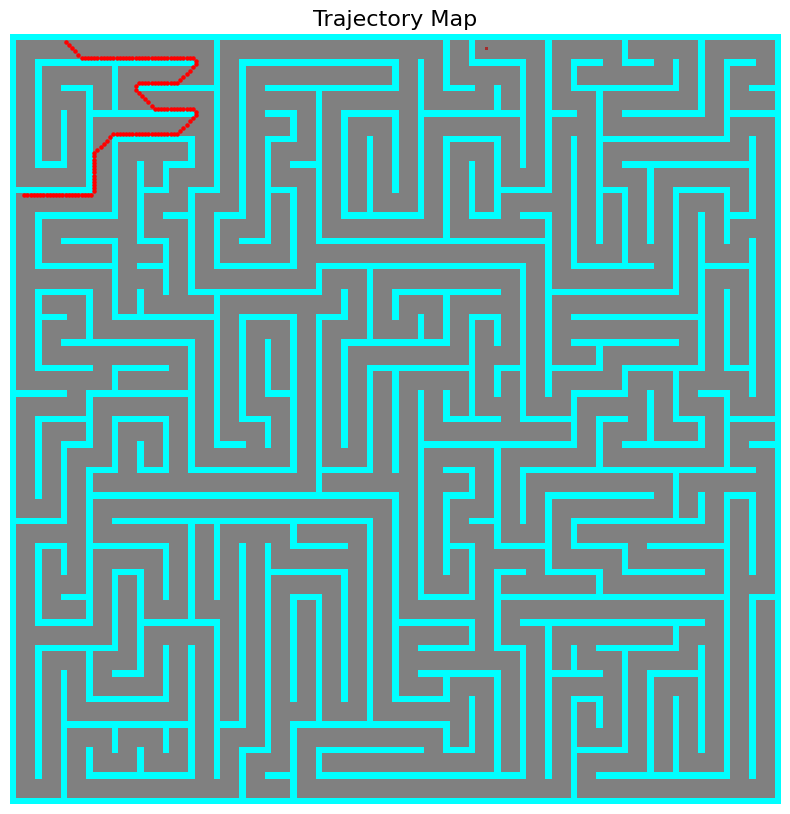

In [58]:
visual_data = loadmat("maze.mat")
# Plot the trajectory map
plt.figure(figsize=(20, 10))
plt.imshow(visual_data['map'], cmap=cmap, interpolation='nearest')

plt.title("Trajectory Map", fontsize=16)

for point in shortest_path:
    plt.scatter(point[1], point[0], color='red', s=5)
plt.axis('off')  # Hide axes

# Show the map

# print(data['map'])
plt.show()
